In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats #The scipy library is a popular Python library for scientific computing and data analysis.
#One of its submodules is stats, which provides a wide range of statistical functions 
import seaborn as sns 
import pylab #pylab is a submodule of the matplotlib library in Python that provides a convenient way to create and manipulate figures and plots.
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
## matplotlib inline is a command in Jupyter notebooks that allows you to display plots generated by Matplotlib directly in the notebook output cells.only works in jupyter no effect in other
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

## Loadind the dataset

In [220]:
df =pd.read_csv("C:\\Users\\tatav\\Documents\\Kaggle Practice\\car price\\CarPrice_Assignment.csv")


In [221]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Basic Understanding of dataset

In [222]:
df.shape

(205, 26)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## From above we can say that we have 10 categorical variables and 16 numerical values

In [224]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [225]:
df.isnull().sum().to_frame().rename(columns={0:"Total No.of Missing Values"})
#to_frame() is a method in pandas that allows you to convert a Series into a DataFrame.

,Total No.of Missing Values
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


##  WE can see that we have no null values now we check for dupliate values


In [226]:
print("Duplicate Values = ",df.duplicated().sum())

Duplicate Values =  0


## Now we will have a look at cotegorical fetures only

In [227]:
df.select_dtypes(include="object").head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


## Now we will see only the numerical features

In [228]:
df.select_dtypes(include=["int","float"]).head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Data cleaning

1. Cleaning the carName Feature

In [229]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


in this we can see we have both car name and company name so we clean the company name

In [230]:
Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
#The lambda function takes each value in the CarName column, splits it by space using the split() method, and returns only the first element of the resulting list using the indexing operator [0].

df.insert(2,"CompanyName", Company_Name)##Here 2 is location of column to be inserted

df.drop(columns=["CarName"],inplace=True)

In [231]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


2.checking for unique car company names

In [232]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#By this we can see that few company name are mispronounced
#Nissan = nissan
#porsche = porcshce
#toyota = toyouta
#vokswagen = volkswagen = vw

3.creating a Function to replace values


In [233]:
def replace(a,b):
    df["CompanyName"].replace(a,b,inplace=True)
replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [234]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

now all the car names seems correct so now we can perform EDA

EXPLORATORY DATA ANALYSIS (EDA)

1.Visualizing Target Feature

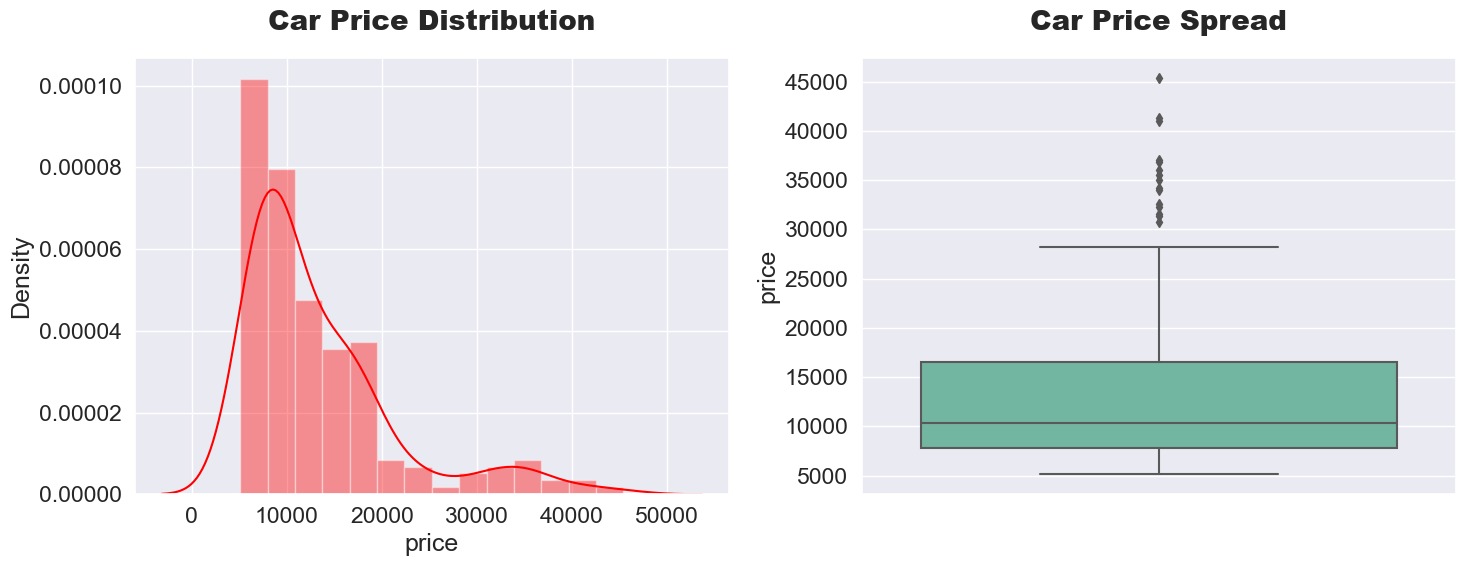

In [235]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)##(row,column,firstsubplot)
sns.distplot(df["price"], color="red",kde=True)#The given code uses the distplot() function from the Seaborn library to create a histogram and a kernel density estimate (KDE) plot for the price column
##kde=True: This parameter specifies that a KDE plot should be shown along with the histogram.
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Set2")
plt.title("Car Price Spread", fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show() 

In [236]:
df["price"].agg(["min","mean","median","max","std","skew"]).to_frame().T ##The agg() function is used to apply multiple aggregation functions to the "price" column

,min,mean,median,max,std,skew
price,5118.0,13276.710571,10295.0,45400.0,7988.852332,1.777678


Insights

1.car price is right skewed
2.there is a significance difference between meanand median
3.most of the cars price is below 14000
4.skewness is >1.5 means data points are highly spread

#Skewness is a statistical measure that describes the degree of asymmetry of a probability distribution. It measures the deviation of the distribution from symmetry around its mean.

skewness(0==symmetrical)

##If the distribution is skewed to the left (meaning that it has a long left tail), the skewness value will be negative.
## mean< median >mode 

On the other hand, if the distribution is skewed to the right (meaning that it has a long right tail), the skewness value will be positive.

## mode < medain > mean

2. Visualizing Total No of cars sold by different company.

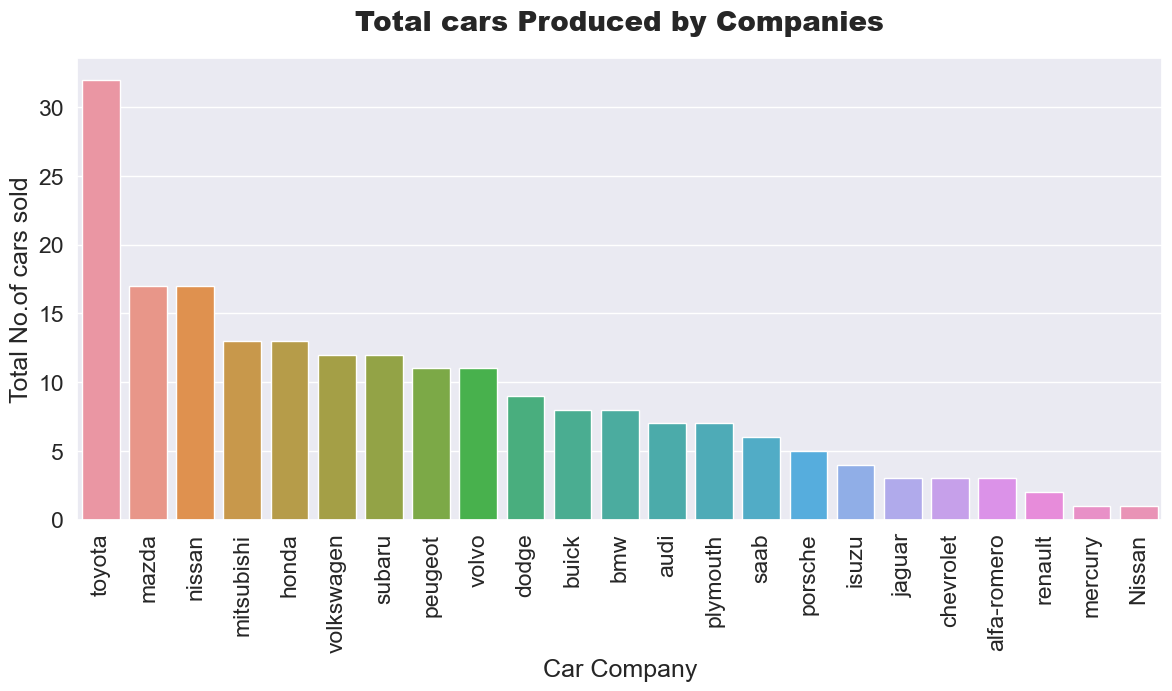

In [237]:
plt.figure(figsize=(14,6))
counts=df["CompanyName"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No.of cars sold")
plt.title("Total cars Produced by Companies", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)##this code rotates the x-axis tick labels of a plot by 90 degrees, making them more readable and avoiding overlapping.
plt.show()

In [238]:
df[df["CompanyName"]=="mercury"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
75,76,1,mercury,gas,turbo,two,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,four,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0


In [239]:
df[df["CompanyName"]=="Nissan"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
89,90,1,Nissan,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1889,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,5499.0


insights

1.toyota has sold the highest number of cars.

2.we can say that toyota is the most favored car company

3.Nisaan ,Mercury or renault are having very low data-points. So we can't make any inference of least sold car companie

## 3.Visualizing Car Company w.r.t Price.

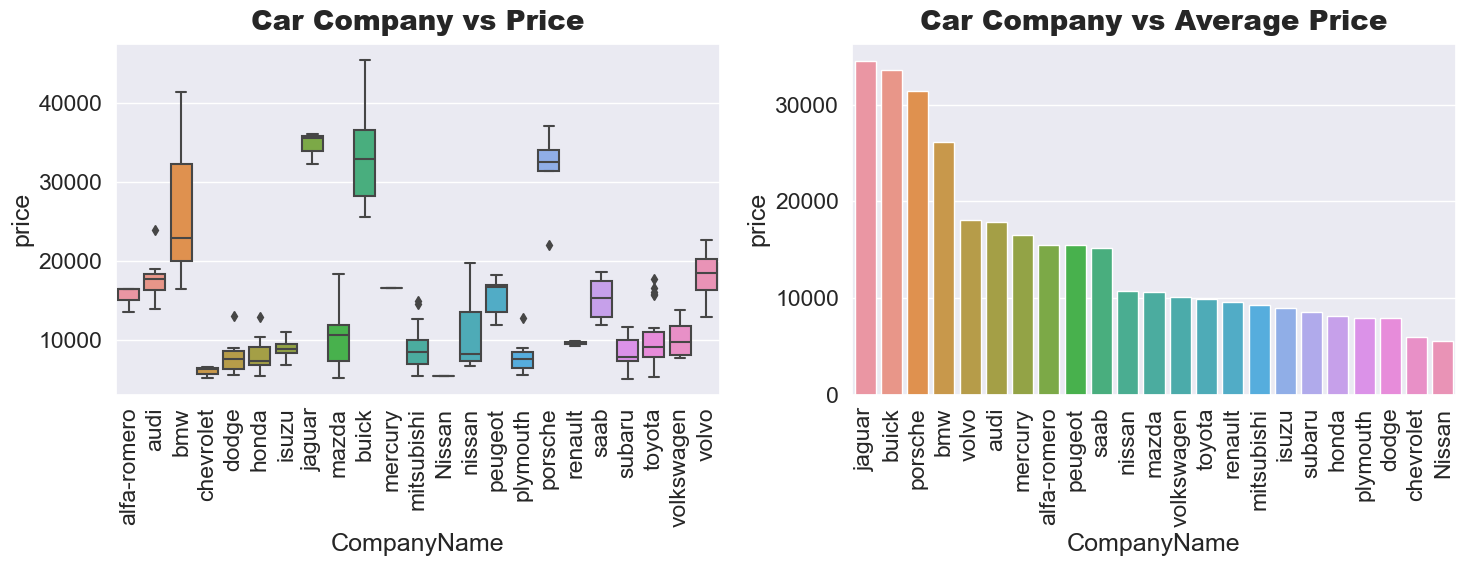

In [240]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(x="CompanyName",y="price",data=df)
plt.xticks(rotation=90)
plt.title("Car Company vs Price", pad=10, fontweight="black", fontsize=20)

plt.subplot(1,2,2)
x =pd.DataFrame(df.groupby("CompanyName")["price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x) 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()

In [241]:
df[df["CompanyName"]=="mercury"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
75,76,1,mercury,gas,turbo,two,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,four,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0


In [242]:
df[df["CompanyName"]=="Nissan"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
89,90,1,Nissan,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1889,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,5499.0


In [243]:
df[df["CompanyName"]=="renault"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
130,131,0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,90,5100,23,31,9295.0
131,132,2,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,90,5100,23,31,9895.0


Insights

1 . Jaguar & buick seems to have the highest price range cars

2 . Car companies like Nisaan,Renault & Mercury are having only 
    one to two datapoints

3.So we can't make any inference related to lowest price range 
  car companies.

Since there are too many categories in car compnay feature. So we can derive a new feature Company Price Range which will show the price range as Low Range, Medium Range, High Range.

### 4.Visualizing car fuel type

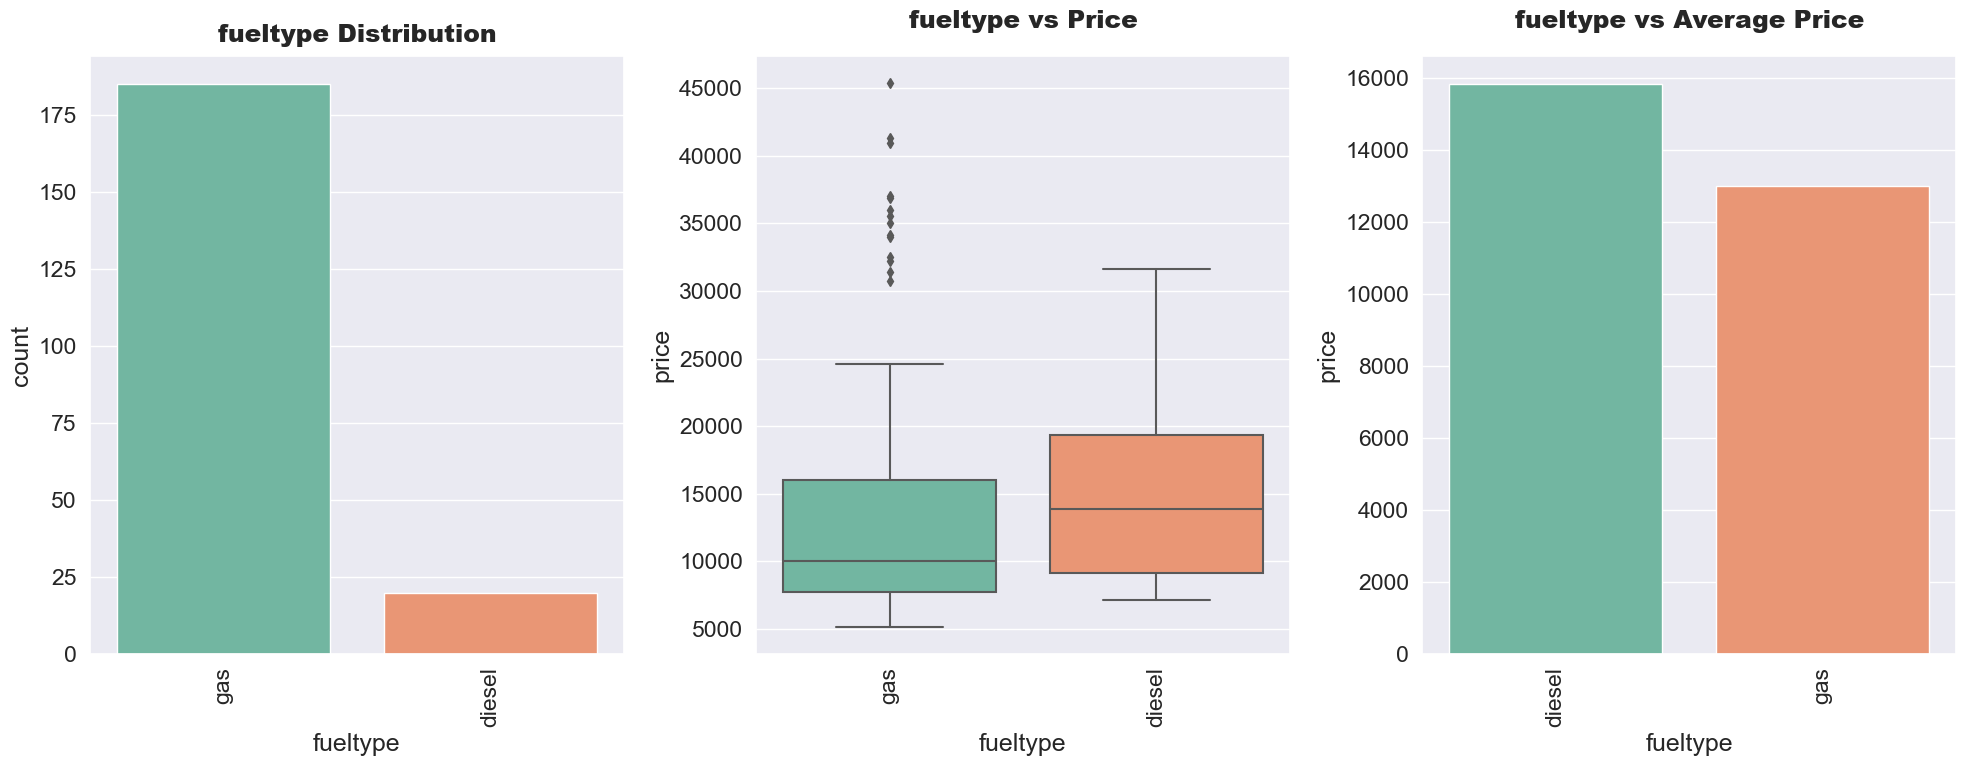

In [244]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    #The x parameter specifies the categorical variable to be plotted on the x-axis. It is set to cols
    #The palette parameter specifies the color palette to be used for the plot. In this case, it is set to "Set2".
    #The order parameter specifies the order in which the categories of the categorical variable should be plotted. It is set to df[cols].value_counts()
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=df,palette="Set2")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("fueltype")



The first subplot uses seaborn's countplot() function to create a bar plot of the frequency distribution of a categorical variable cols in the dataframe df

The second subplot uses seaborn's boxplot() function to create a box plot of the relationship between the categorical variable cols and the continuous variable "price" in the dataframe df

The third subplot uses seaborn's barplot() function to create a bar plot of the average "price" for each category of the categorical variable cols in the dataframe df

insights

1.We can clearly make an inisght that Cars having gas fuel system is mostly sold.

2.From the second plot we can make an insight that Gas Fuel Sysytem cars are availabe within every price range

3.From the third plot we can make an inisght that the Average price of gas fuel type cars are less than diesel fuel type cars.

### 5.Visualizing Aspiration Feature

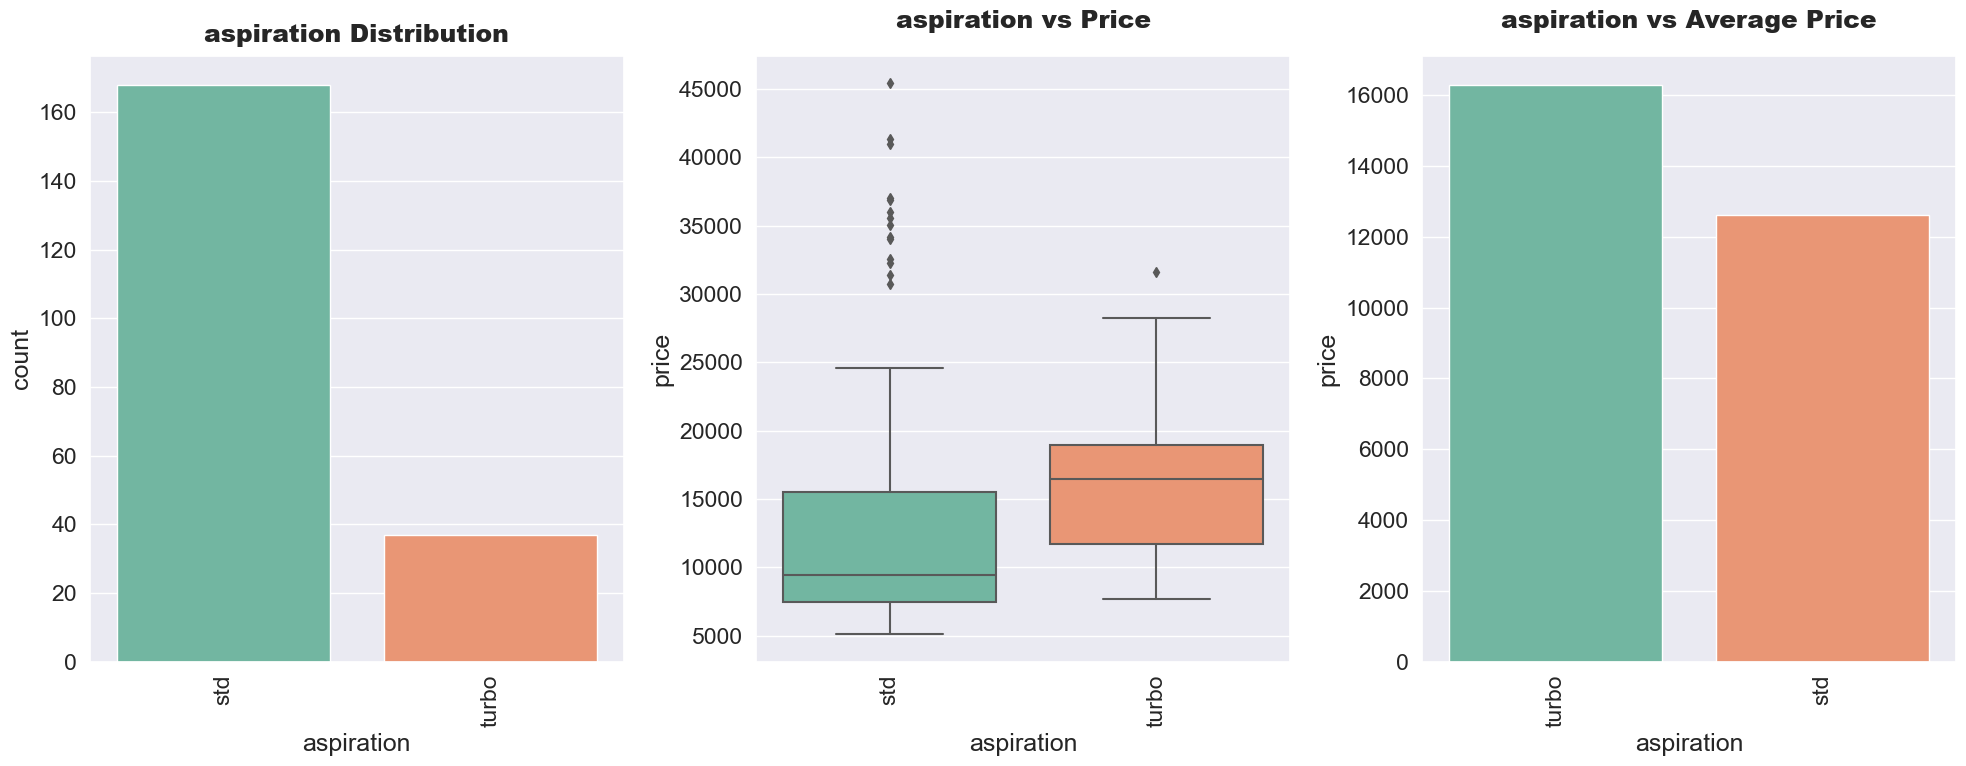

In [245]:
categorical_visualization("aspiration")
##This code is calling the categorical_visualization() function with the argument "aspiration". This suggests that the categorical variable being analyzed in this case is "aspiration".


#### Observation and insights

1.Cars having STD Aspiration are highly sold when compared with Turbo Aspiration.

2.Cars having Turbo Aspiration have higher price range than the STD Aspiration.

1.Outliers present in STD Aspiration states that some of the cars having std aspiration are expensive too



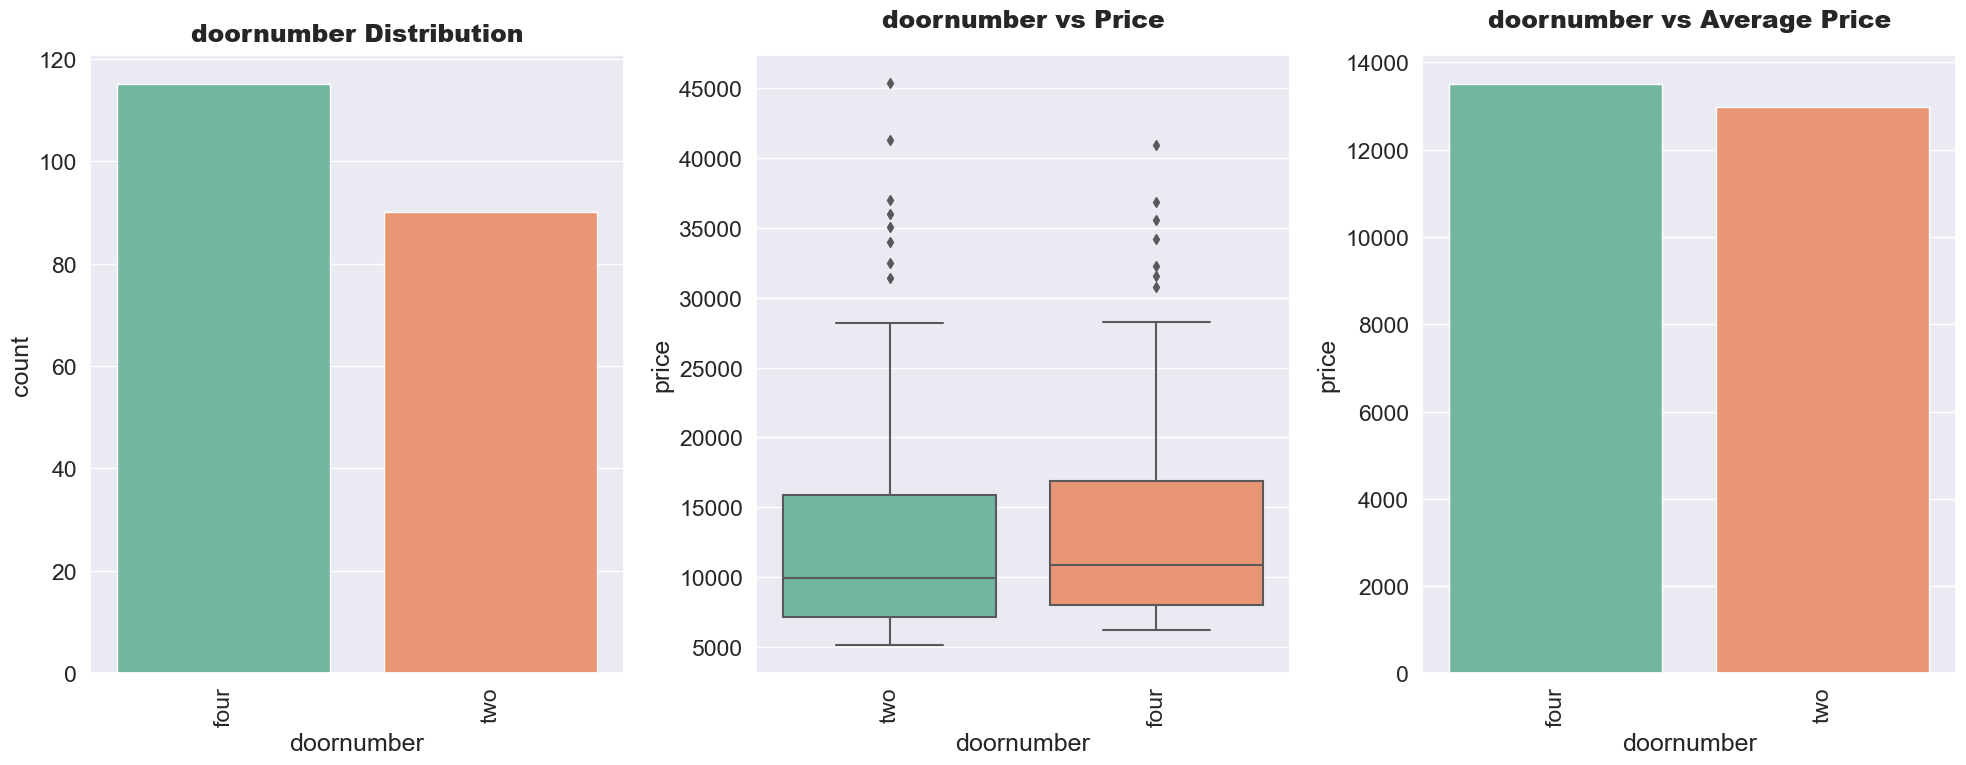

In [246]:
categorical_visualization("doornumber")

Observation

Cars having Four Doors are mostly sold when compared with cars having Two Doors.

Cars having Fours Doors are little more expensive when we compare the avergae price of cars having two doors or four doors.

Insights

Cars having Four Doors are mostly sold. But there's not a big difference between the sales of cars having four doors & two doors..

Outliers prsesent in two doors cars states that some of the cars are are more expensive than the cars having four doors

Door numbers category is not affecting the price that much.


#### 7. Visualizing Car Body Type Feature.

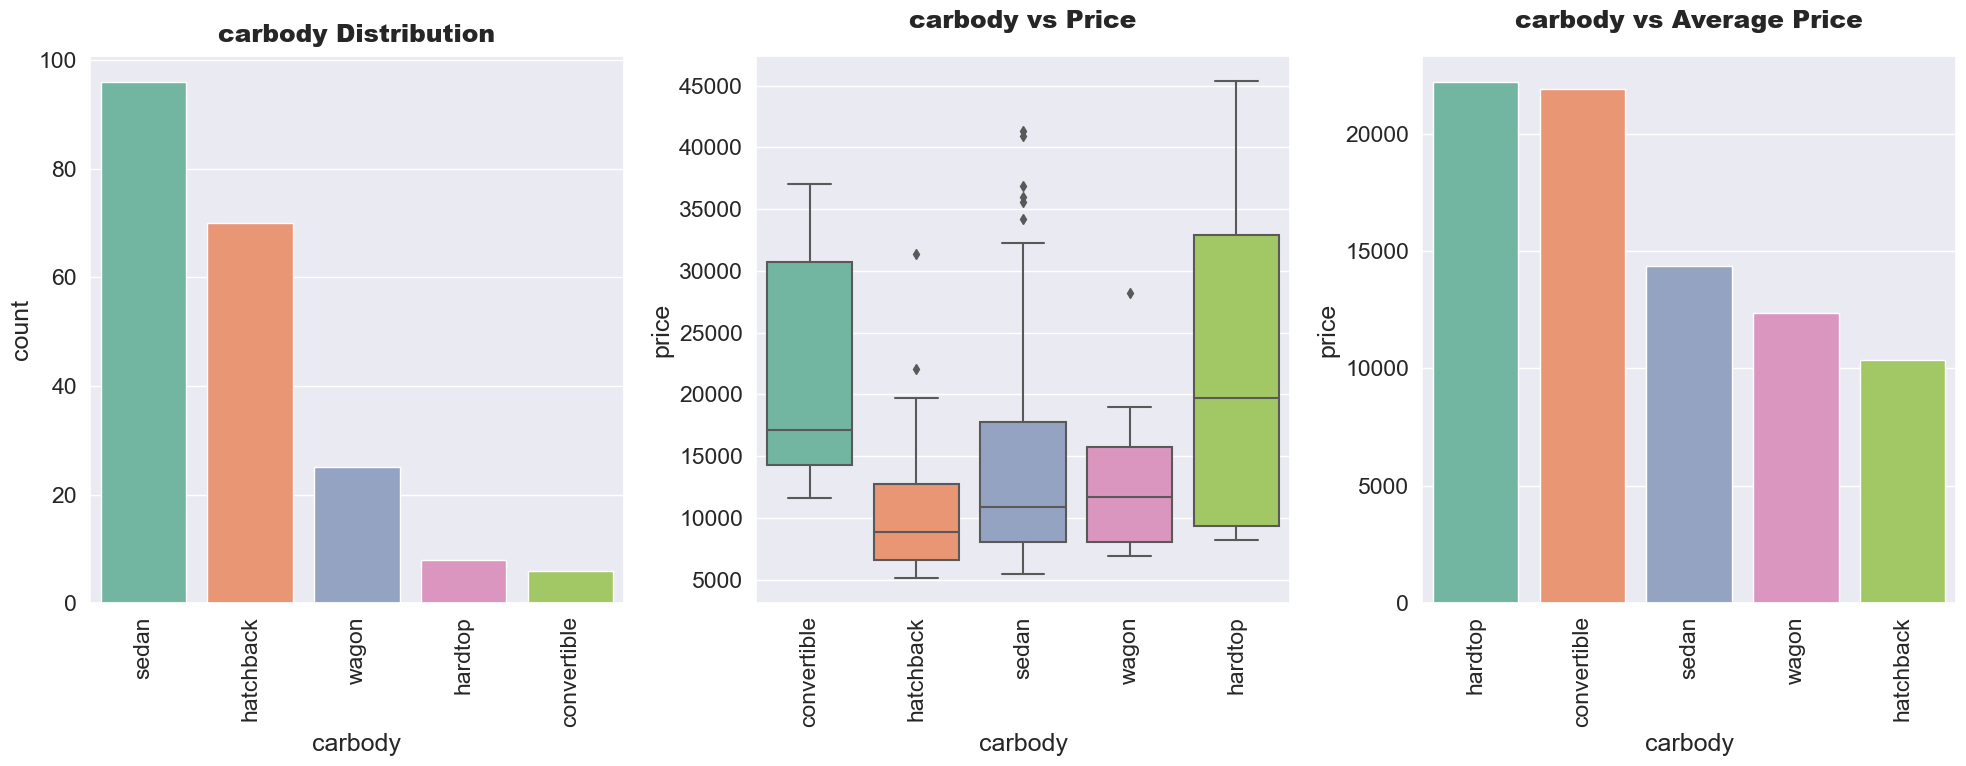

In [247]:
categorical_visualization("carbody")

Obseravtion

Cars having sedan body-type are mostly sold followed by hatchback.

Cars having convertible or hardtop body-type are less sold.

Cars having Hardtop body-type is the mostly expensive cars followed by convertible.

Insights

Convertible & Hardtop body-types are less sold because they are very expensive cars. So most of the customers couldn't prefer it..

Cars having Sedan body-type is the third most expensive car. But still its having the most number of car sales. So we can say customers prefer medium price range cars.

#### 8. Visualizing Drive Wheel Feature.

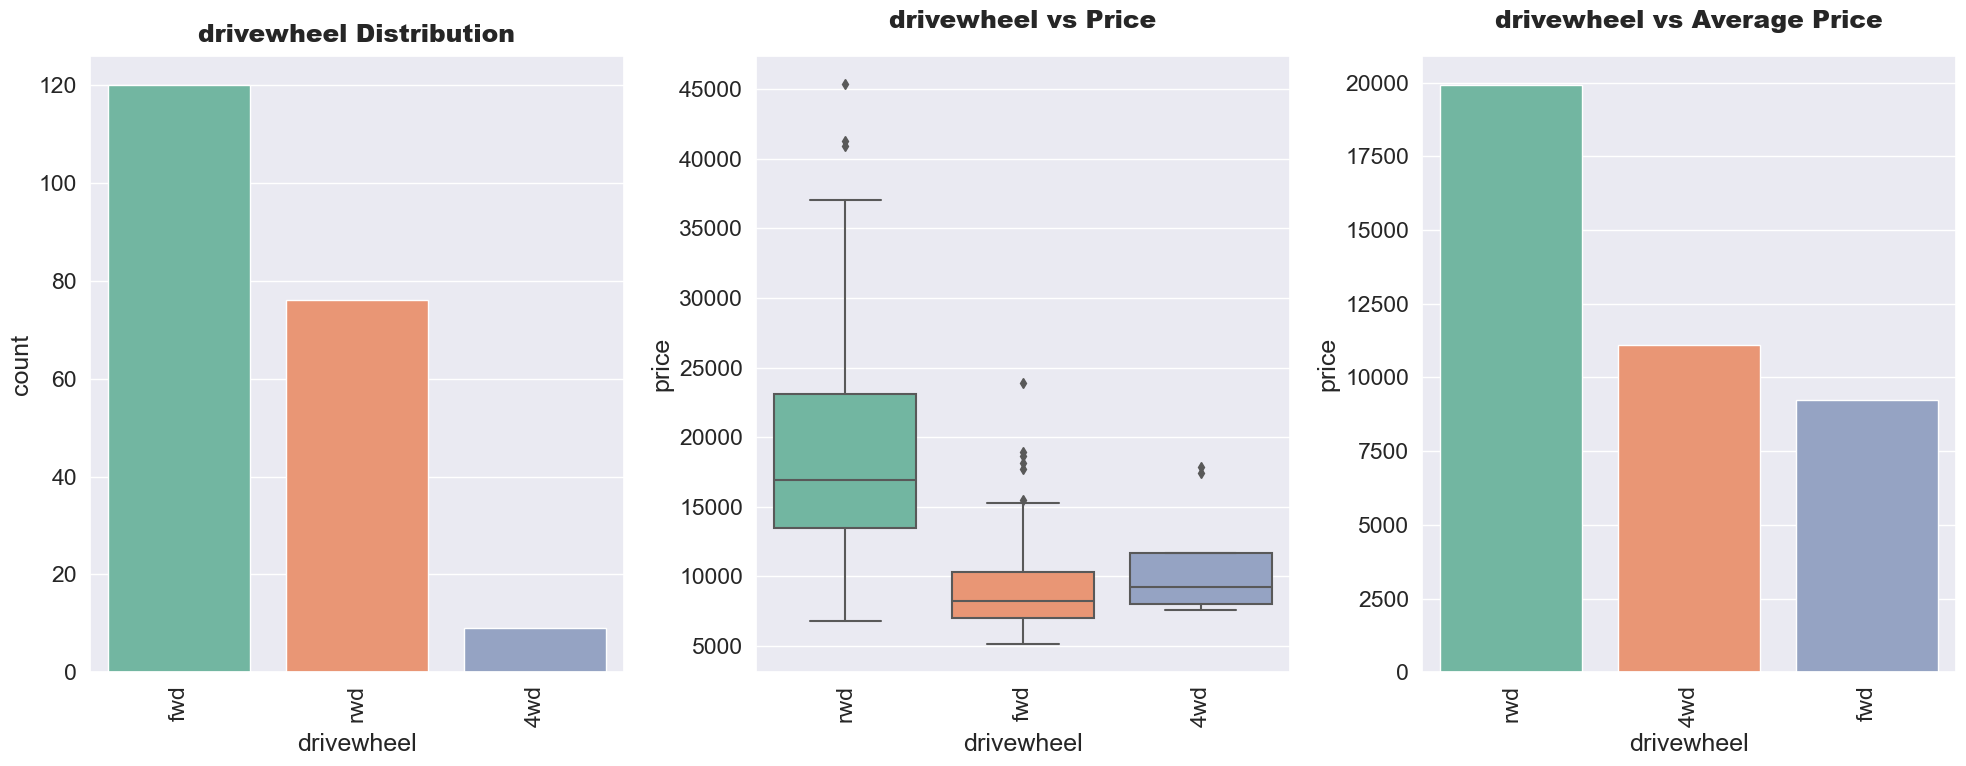

In [248]:
categorical_visualization("drivewheel")

Observation

Most of the cars which are sold are having Front Wheel Drive (FWD) followed by Rear Wheel Drive (RWD).

Cars having Rear Wheel Drive are mostly expensive cars. But cars having Front Wheel Drive are the cheapest.

Insights

We can make an insight that the high rated cars must be using Rear Wheel Drive.

Cars with low prices must be using Forward Wheel Drive

#### 9. Visualizing Engine Location Feature

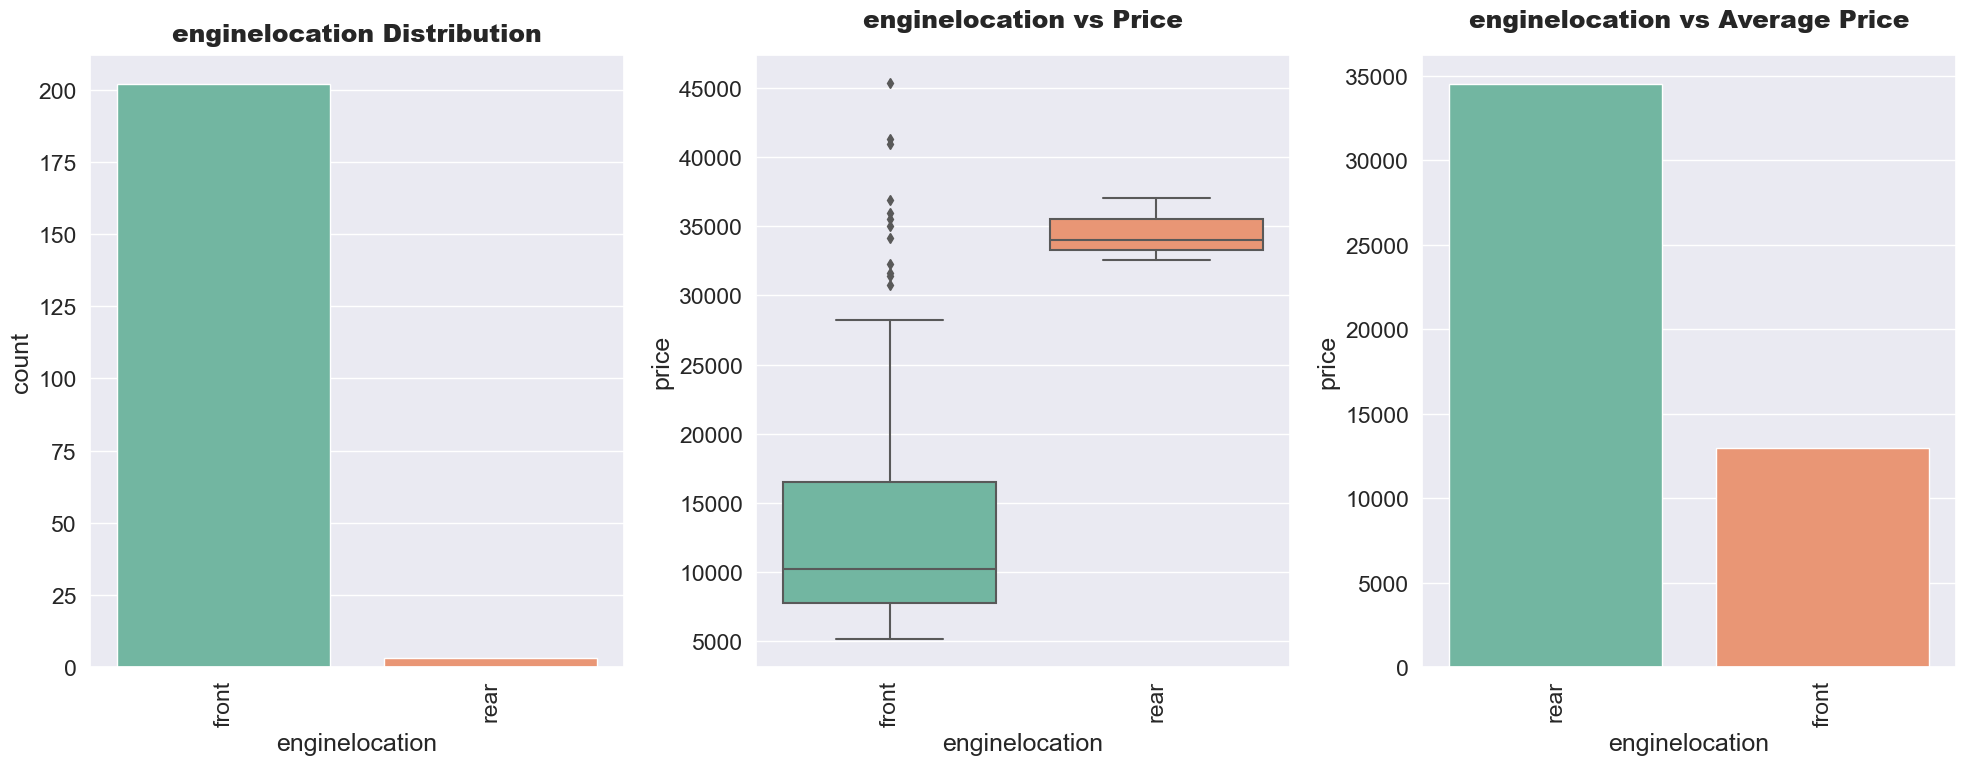

In [249]:
categorical_visualization("enginelocation")


In [250]:
df[df["enginelocation"]=="rear"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
126,127,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
127,128,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
128,129,3,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0


Observation

Most of the cars are having engine location in front.

Insights

Note there are only 3 data-points for the rear category.
So we can't make any inference of car price when compared with engine location.

If we want we can drop this feature before training as it may lead to overfitting.

#### 10. Visualizing Engine Type Feature.

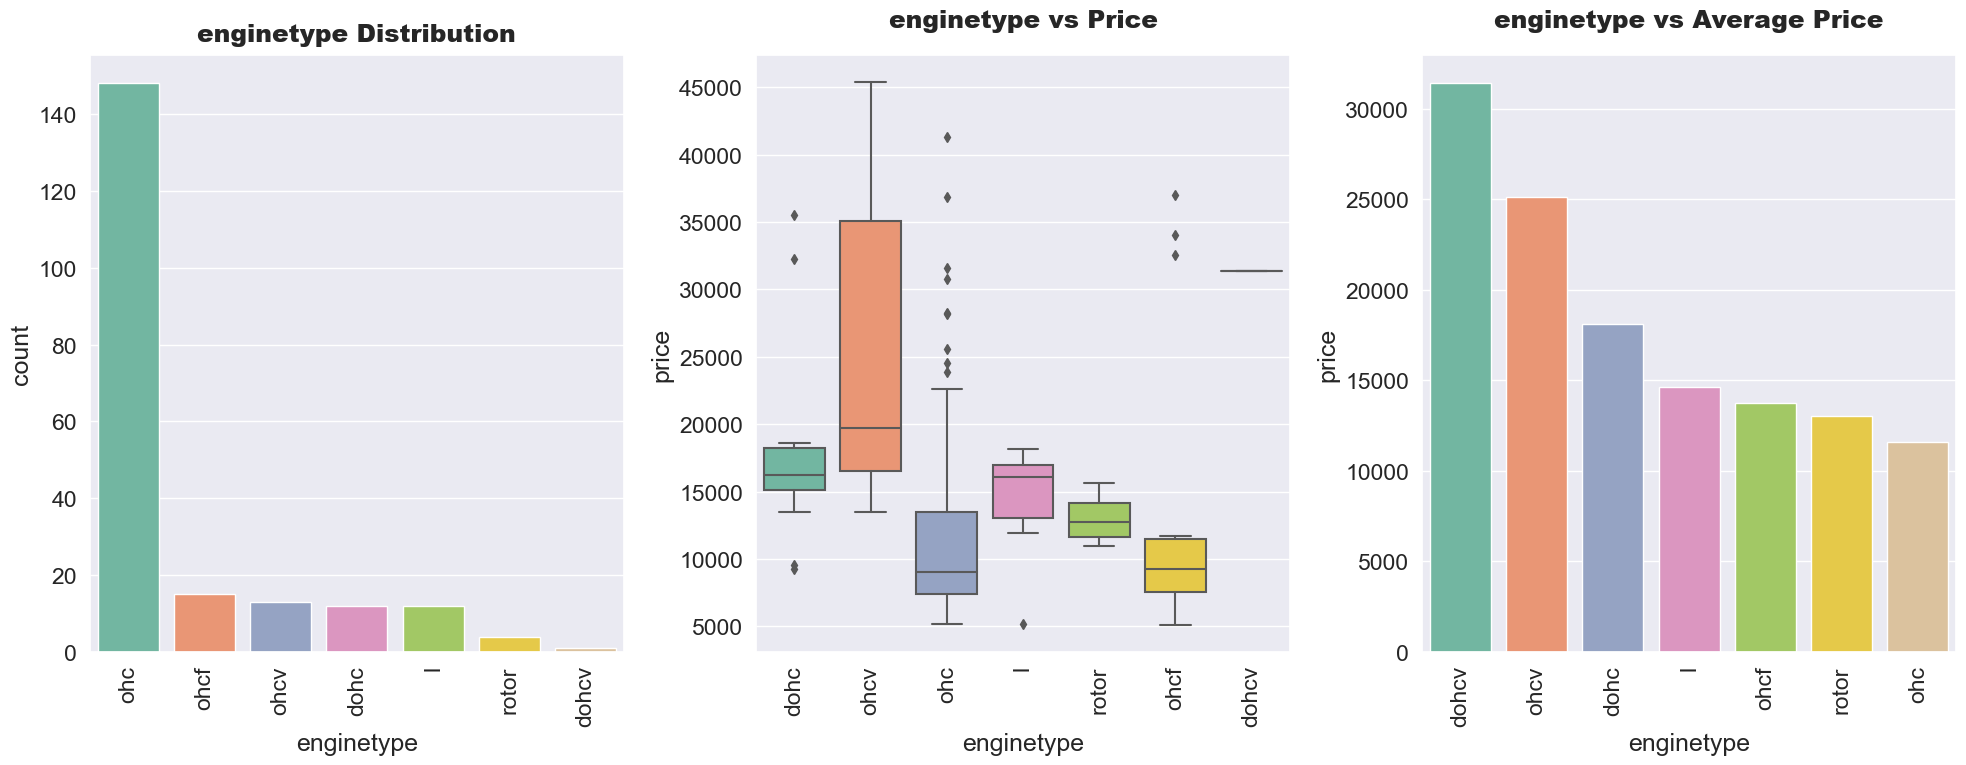

In [251]:
categorical_visualization("enginetype")

In [252]:
df[df["enginetype"]=="dohcv"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
129,130,1,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5


In [253]:
df[df["enginetype"]=="rotor"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
55,56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,10945.0
56,57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,11845.0
57,58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,13645.0
58,59,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,3.33,3.255,9.4,135,6000,16,23,15645.0


Insights

Cars having Overhead Camshaft (OHC) engines are mostly sold..

Only one car has been sold having engine type dohcv.

There are very few data-points of engine type dohcv & rotor. So we can say that cars having ohcv engine types are mostly expensive.

Cars hvaing Overhead Camshaft (OHC) engines are least expensive cars.

#### 11. Visualizing Cyclinder Number Feature.

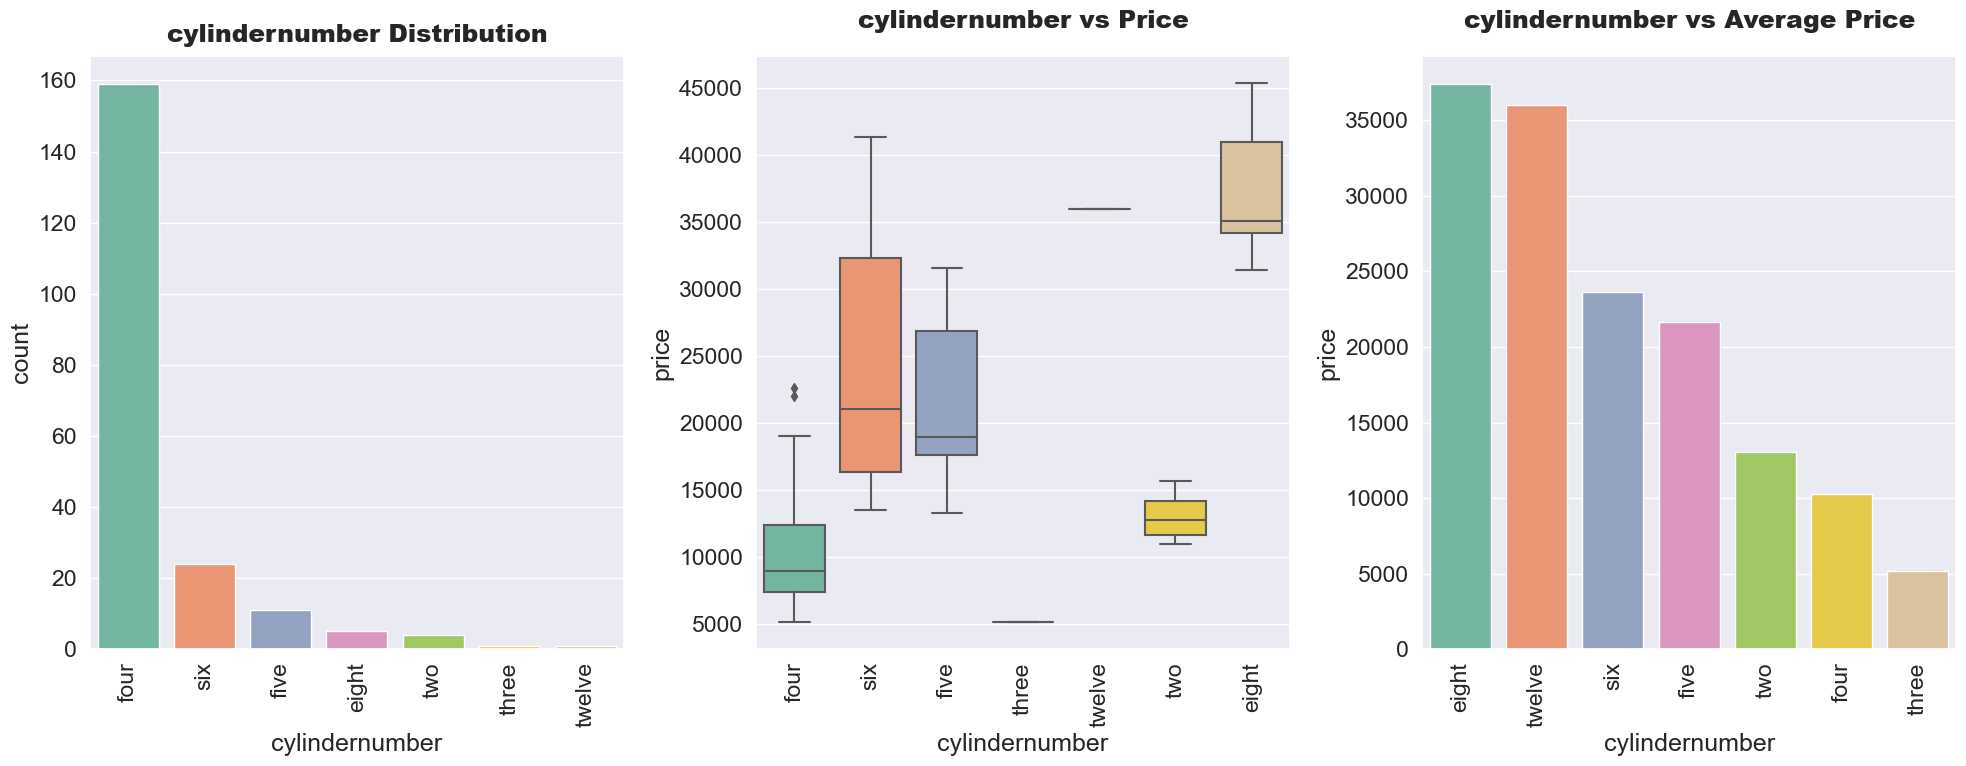

In [254]:
categorical_visualization("cylindernumber")

In [255]:
df[df["cylindernumber"]=="three"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,2,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0


In [256]:
df[df["cylindernumber"]=="twelve"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
49,50,0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0


Insights

Most of the cars are having Four cyclinders followed by cars having six cyclinders.

There are only one data-point each for car having Three & Twelve data-points.

Cars having eight cyclinders are most expensive cars followed by six cyclinders.

#### 12. Visualizing Fuel System Feature.

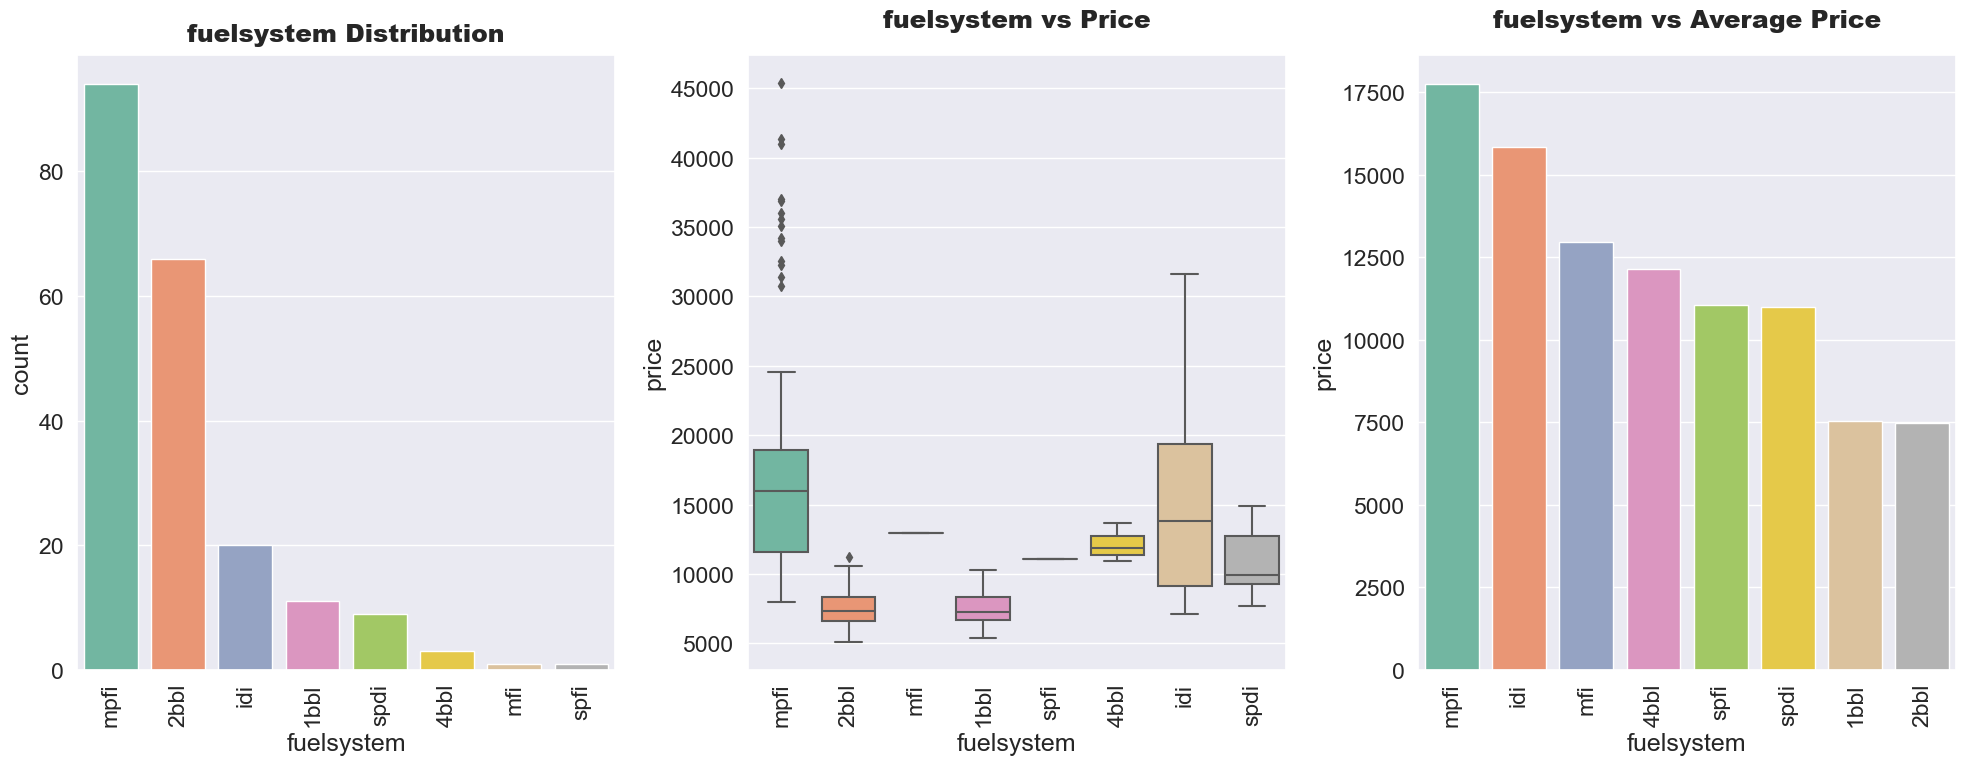

In [257]:
categorical_visualization("fuelsystem")

In [258]:
df[df["fuelsystem"]=="mfi"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
29,30,3,dodge,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.6,3.9,7.0,145,5000,19,24,12964.0


In [259]:
df[df["fuelsystem"]=="spfi"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
46,47,2,isuzu,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048.0


Insight

Most of the cars are having mpfi & 2bbl fuelsystems.

Cars having mpfi fuel system are the expensive cars followed by idi fuel system cars.

There are only one data-point for each mfi and spfi fuelsystem cars. So we can make any further inference

#### 13.Visualizing Symboling Feature.

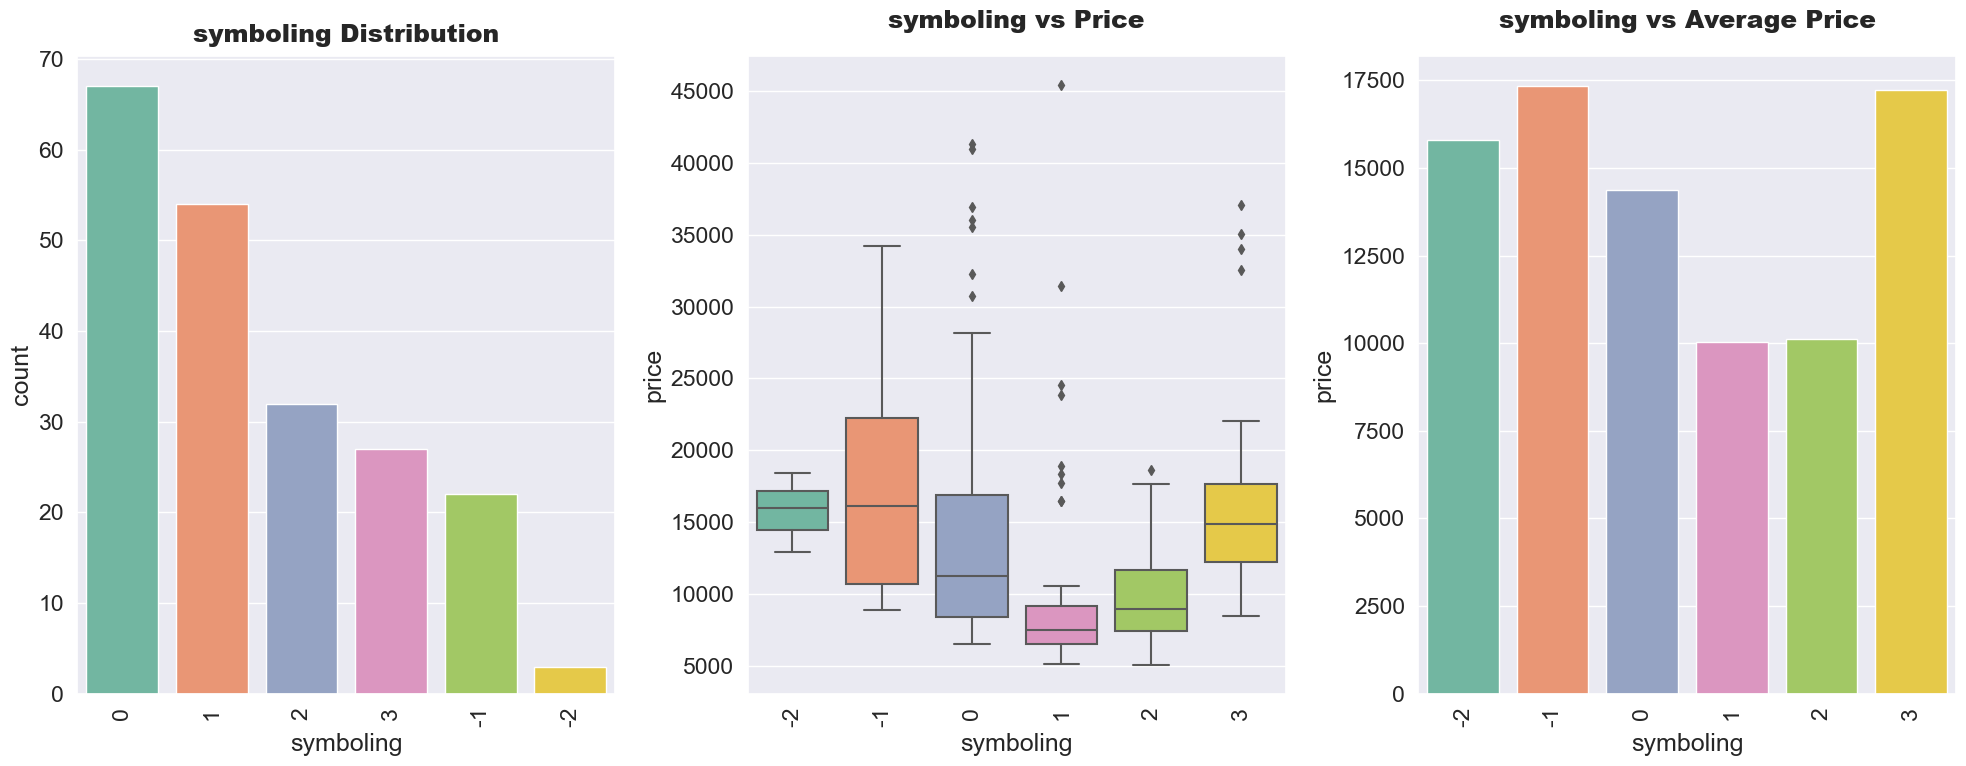

In [260]:
categorical_visualization("symboling")

The symboling represents the degree to which the car is riskier than its price suggests.

It ranges from -3 to +3, with higher negative values indicating higher risk and higher positive values indicating lower risk.

In other words, a car with a symboling of -3 is considered riskier than a car with a symboling of +3, and is likely to have a lower price as a result.

Insights

We can clearly observe cars having symboling 0 or 1 are motly preferred.

We can aslo observe that symboling -1, 0, 3 are expensive.

#### 14. Visualizing "CarLength", "CarWidth","Carheight" Features w.r.t "Price".

In [261]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="price",data=df,color="blue")
        plt.title(f"{col} vs price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()#plt.tight_layout() is a function in the matplotlib library that automatically adjusts the spacing between subplots in a figure to optimize the layout.
        x+=1

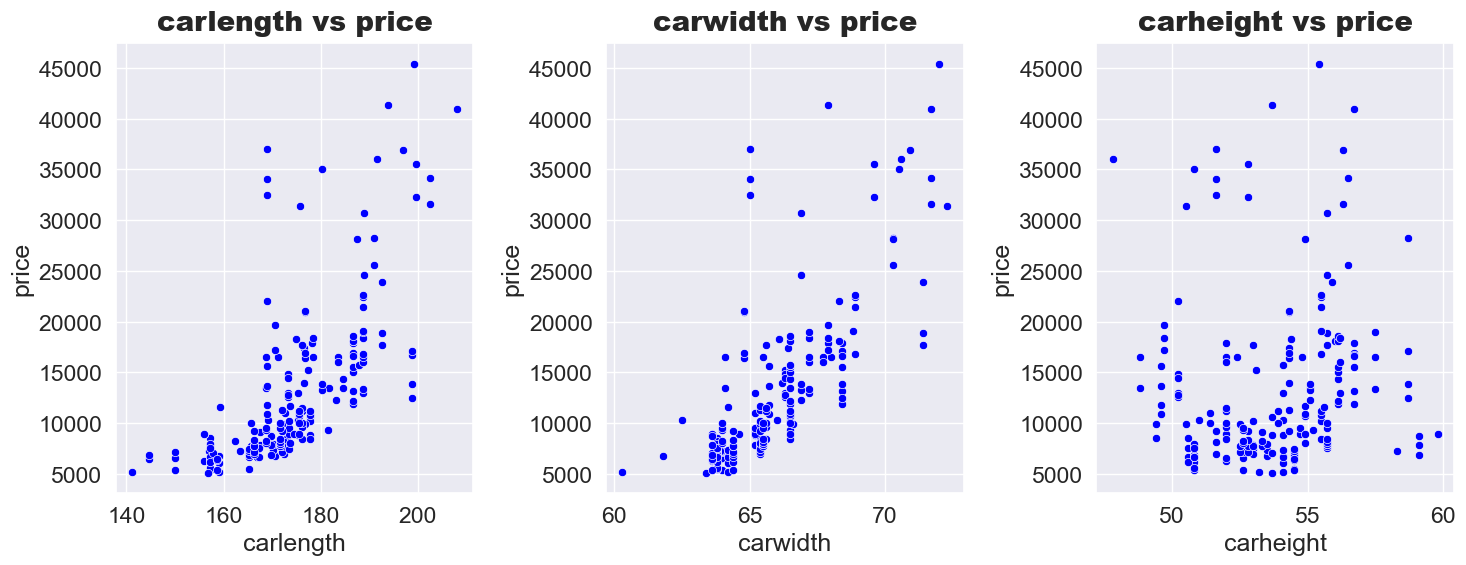

In [262]:
scatter_plot(["carlength","carwidth","carheight"])

Insights

We can clearly observe that carlength & carwidth features are highly correlated with the price feature.

So we can make an insight that with increment in length & width of the car there is an increment in price too.

From carlength vs price we can't make any inference as the data-points are too scattered.

Since CarHeight is not affecting Price We can drop this feature.

#### 15. Visualizing "EngineSize","Boreratio" & "Stroke" Features

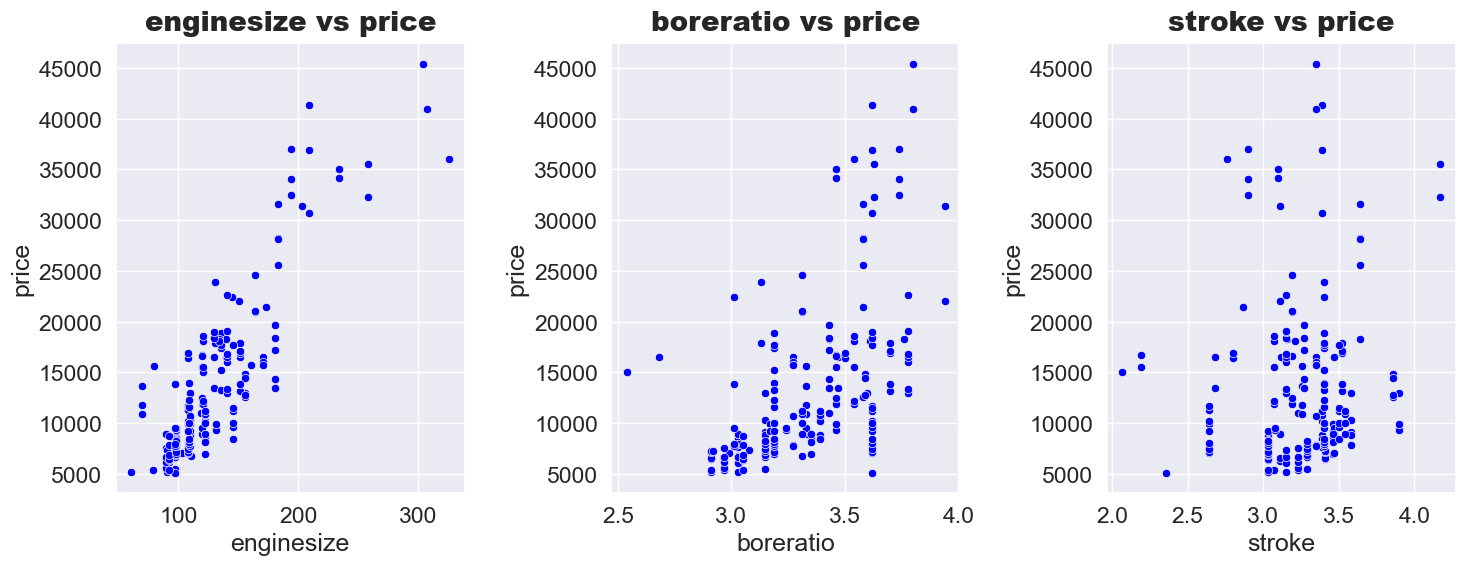

In [263]:
scatter_plot(["enginesize","boreratio","stroke"])

Insights

We can clearly observe that Enginesize is highly correlated with price feature. So we can say with the increment in enginesize the price of the cars increases.

From Boreratio vs Price we can observe that the feature is not highly correlated but still there's a correlation between the features. So we can say with increment in boreratio the price of cars increases.

From Stroke vs Price we can't make any inference as the data-points are too scattered.

Since Stroke is not affecting Price that much. We can drop this feature.

#### 16. Visualizing "Compreessionratio","Horesepower" & "Peakrpm" Features.

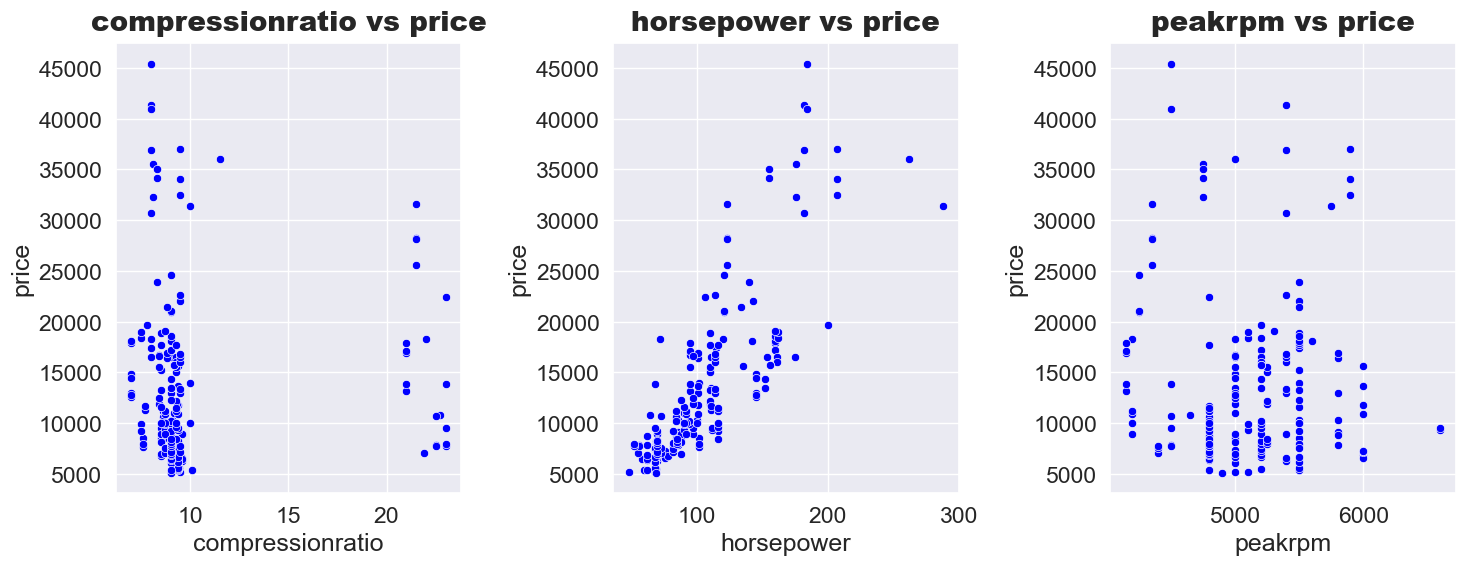

In [264]:
scatter_plot(["compressionratio","horsepower","peakrpm"])

Insights

We can clearly observe that Horsepower is highly correlated with Price. So we can say with the increment in Horsepower the price of cars also increases.

From Compressionratio vs Price & Peakrpm vs Price visuals we can't make any inference as the data-points are too scattered.

Since Compressionratio & Peakrpm is not affecting price. So we can drop this features.

#### 17. Visualizing "WheelBase" & "Curbweight" Features.

In [265]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,2,x)
        sns.scatterplot(x=col,y="price",data=df,color="blue")
        plt.title(f"{col} vs price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()#plt.tight_layout() is a function in the matplotlib library that automatically adjusts the spacing between subplots in a figure to optimize the layout.
        x+=1

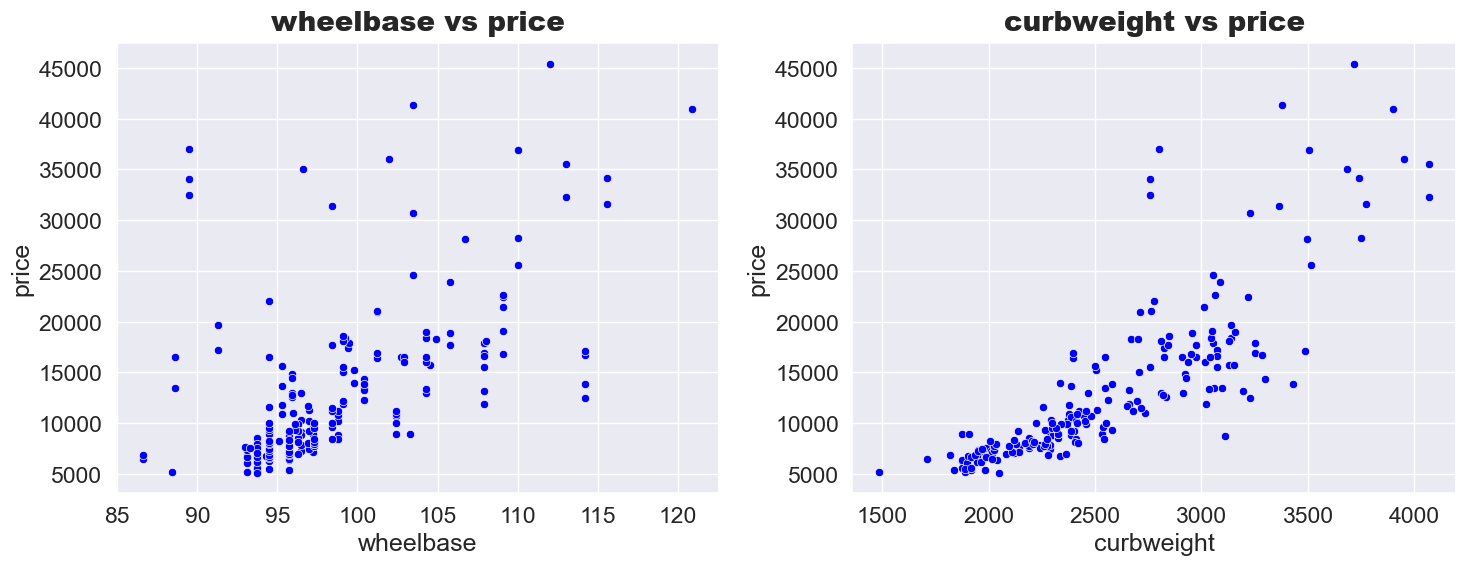

In [266]:
scatter_plot(["wheelbase","curbweight"])

Insights

We can clearly observe that Curbweight is highly correlated with Price. So we can say with the increase in curbweight the price of cars increases.

From wheelbase vs price we can say that they are not highly correlated but still there's a correlation. So with wheel base the price of the cars also increases.

#### 18.Visualizing "Citympg" & "Highwaympg" Features.

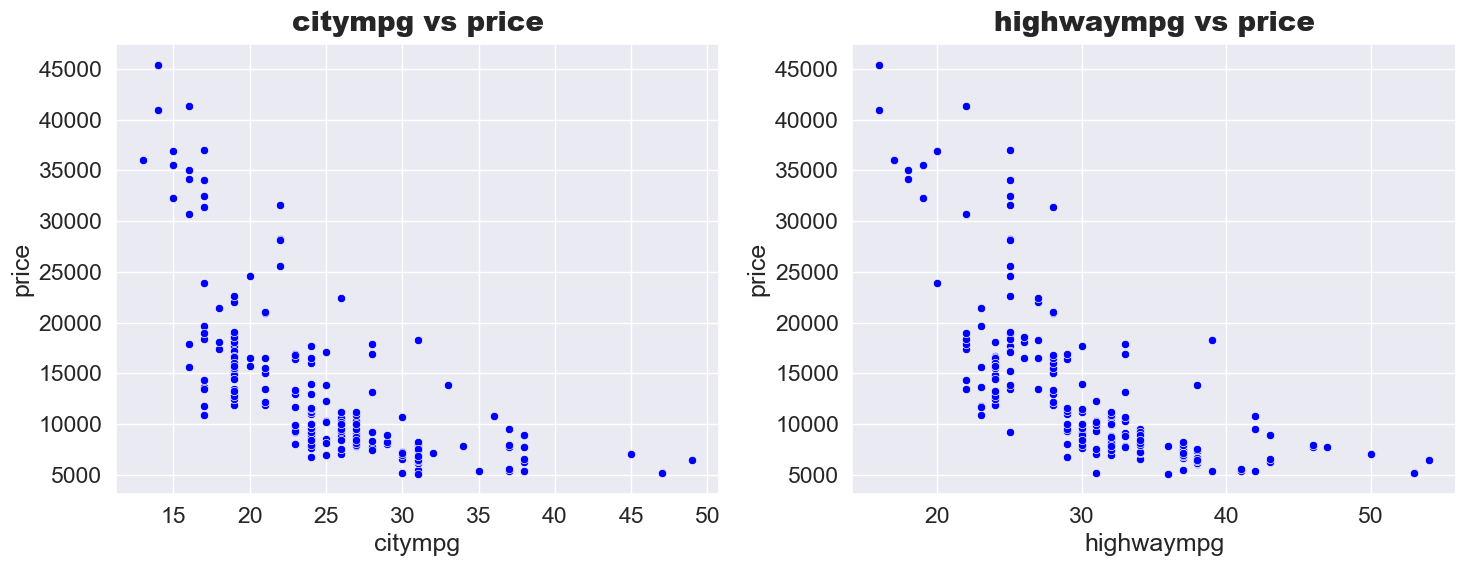

In [267]:
scatter_plot(["citympg","highwaympg"])

Insights

We can clearly observe that Citympg & Highwaympg are having negative correlation with the price.

So we can say that with the increment in citympg & Highwaympg the price of the cars decreases.

So our both Citympg & Highwaympg are useful features for price prediction.

List of all the useful Categorical Features.

CompanyName
Fuel Type
Aspiration
Door Number
Car Body
Drive Wheel
Engine Type
Cyclinder Number
Fuel System


Wheelbase
Carlength
Carwidth
Curbeweight
Enginesize
Boreratio
Horsepower
citympg
Highwaympg
Price

##              Feature Engineering

#### 1. Deriving New Features From "Company Name" Feature.

As we made an insight above that we can split the car company name into different price ranges.Like Low Range, Medium Range, High Range cars.

In [268]:
z= round(df.groupby(["CompanyName"])["price"].agg(["mean"]),2).T
#The groupby() method is used to group the rows of the DataFrame by the unique values in the "CompanyName" column.
#dictionary has one key-value pair, where the key is the string "mean" and the value is the string "price". This tells agg() to calculate the mean of the "price" column for each group.
#The resulting DataFrame is then transposed using the T attribute, which swaps the rows and columns of the DataFrame. This makes it easier to display the data in a horizontal format
z

CompanyName,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
mean,5499.0,15498.33,17859.17,26118.75,33647.0,6007.0,7875.44,8184.69,8916.5,34600.0,10652.88,16503.0,9239.77,10704.88,15489.09,7963.43,31400.5,9595.0,15223.33,8541.25,9885.81,10077.5,18063.18


In [269]:
df = df.merge(z.T,how="left",on="CompanyName") #creating a new column in datast for al the mean values

In [270]:
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['CarsRange'] = pd.cut(df["mean"],bins,right=False,labels=cars_bin)
df.head()
## creates a new column Cars Range

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean,CarsRange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,15498.33,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,15498.33,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,15498.33,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,17859.17,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,17859.17,Medium


#### Explanation

This code creates a new column in the df DataFrame called "CarsRange" that categorizes the mean price of each car in the DataFrame into one of three ranges: "Budget", "Medium", or "Highend".

The pd.cut() function is used to create the categories. It takes three main arguments: the column to be binned (in this case, df['mean']), the bin edges (in this case, [0, 10000, 20000, 40000]), and the labels for each bin (in this case, ['Budget', 'Medium', 'Highend']).

The right argument is set to False, which means that the bins are left-closed and right-open. This means that a value of exactly 10000 will be included in the "Budget" bin, while a value of exactly 20000 will be included in the "Medium" bin, but not in the "Budget" or "Highend" bins.


## Data Preprocessing

#### 1. Creating new DataFrame with all the useful Features.

In [271]:
new_df = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price','CarsRange']]

In [272]:
new_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,CarsRange
0,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,Medium
1,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,Medium
2,gas,std,two,hatchback,rwd,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,Medium
3,gas,std,four,sedan,fwd,ohc,four,mpfi,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,Medium
4,gas,std,four,sedan,4wd,ohc,five,mpfi,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,Medium


#### 2. Creating Dummies Variables for all the Categorical Features.

Creating dummy variables for categorical features is a common technique used in data analysis to convert categorical variables into numerical variables

using the get_dummies() function. This function takes a DataFrame or Series as input and returns a new DataFrame with a binary column for each unique value in the original categorical column.

In [273]:
new_df = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem","CarsRange"],data=new_df)

In [274]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


#### 3. Feature Scaling of  Numerical Data

Feature scaling is a technique used to standardize the range of values of numerical features in a dataset. This is often done to ensure that all features are on a similar scale, which can help improve the performance of certain machine learning algorithms.

In [275]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [276]:
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
            'citympg','highwaympg']
new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

In [277]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


#### 4. Selecting Features & Labels for Model Training & Testing.

In [278]:
x = new_df.drop(columns=["price"])
y = new_df["price"]

In [279]:
x.shape

(205, 48)

In [280]:
y.shape

(205,)

#### 5. Splitting Data for Model Traning & Testing.

In [281]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [282]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (164, 48)
x_test - >   (41, 48)
y_train - >   (164,)
y_test - >   (41,)


## Model Building

In [283]:
training_score = []
testing_score = []

In [284]:
from sklearn.metrics import r2_score
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)

#### 1. Linear-Regression Model

In [285]:
from sklearn.linear_model import LinearRegression
model_prediction(LinearRegression())



r2_Score of LinearRegression() model on Training Data is: 96.0384799952984
r2_Score of LinearRegression() model on Testing Data is: 88.40540860813918


#### 2. Decision-Tree-Regressor Model

In [286]:
from sklearn.tree import DecisionTreeRegressor
model_prediction(DecisionTreeRegressor())


r2_Score of DecisionTreeRegressor() model on Training Data is: 99.86537119069865
r2_Score of DecisionTreeRegressor() model on Testing Data is: 90.76053587007087


#### 3. Random-Forest-Regressor Model

In [287]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
model_prediction(RandomForestRegressor())


r2_Score of RandomForestRegressor() model on Training Data is: 98.66282752950404
r2_Score of RandomForestRegressor() model on Testing Data is: 95.40982109698696


In [288]:
model_prediction(AdaBoostRegressor())


r2_Score of AdaBoostRegressor() model on Training Data is: 96.26480113785878
r2_Score of AdaBoostRegressor() model on Testing Data is: 91.58048986130065


In [289]:
model_prediction(GradientBoostingRegressor())


r2_Score of GradientBoostingRegressor() model on Training Data is: 99.37237309193024
r2_Score of GradientBoostingRegressor() model on Testing Data is: 92.12400192315705


In [290]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [291]:
from lightgbm import LGBMRegressor
model_prediction(LGBMRegressor())


r2_Score of LGBMRegressor() model on Training Data is: 96.22424829025965
r2_Score of LGBMRegressor() model on Testing Data is: 88.73966577207719


In [292]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [293]:
from xgboost import XGBRegressor
model_prediction(XGBRegressor())


r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 99.86524431746504
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

In [294]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [295]:
from catboost import CatBoostRegressor
model_prediction(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x0000023116DF9280> model on Training Data is: 99.7086556035143
r2_Score of <catboost.core.CatBoostRegressor object at 0x0000023116DF9280> model on Testing Data is: 94.01252203857477


## All model comparision

In [296]:
models = ["Linear Regression","Decision Tree","Random Forest","Ada Boost","Gradient Boost","LGBM","XGBoost","CatBoost"]

In [297]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [298]:
df

,Algorithms,Training Score,Testing Score
0,Linear Regression,96.038480,88.405409
1,Decision Tree,99.865371,90.760536
2,Random Forest,98.662828,95.409821
3,Ada Boost,96.264801,91.580490
4,Gradient Boost,99.372373,92.124002
5,LGBM,96.224248,88.739666
6,XGBoost,99.865244,93.011184
7,CatBoost,99.708656,94.012522


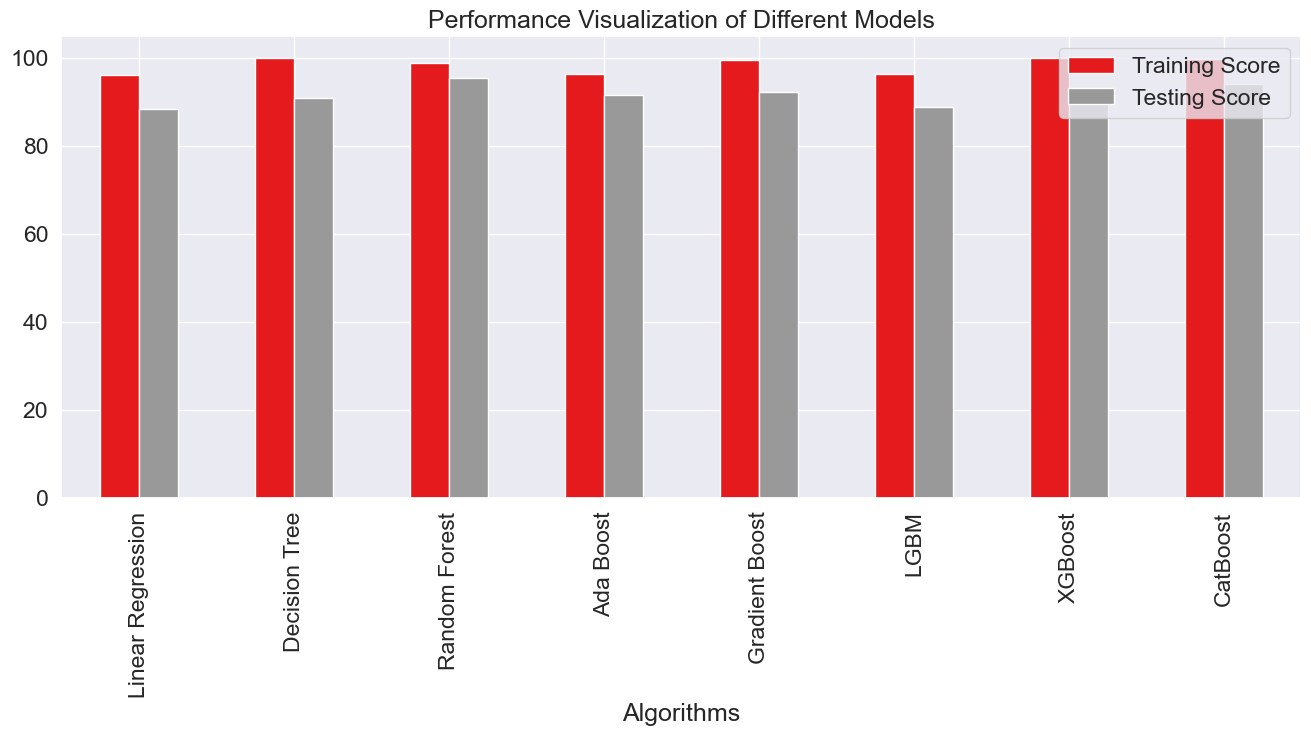

In [299]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"],figsize=(16,6),kind="bar",title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

Observation

Highest performance was give by Random Forest Model around 95%

But catboost & XGBoost Model performance was also good.

So we can use any of these three Models for predicting the price of car in future.